# # classification voice

# # step 1

>Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

We're trying to classify the gender (i.e., label) of the voice-based on 21measurements that we're provided: 'meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'.

>Did you define the metric for success before beginning?

Let's do that now. Since we're performing classification, we can use accuracy at least 98% accuracy.

>Did you understand the context for the question and the scientific or business application?

We're building a data analysis for search engines, to improve the search process based on user gender.

# # step 2

The next step is to look at the data we're working with. Even curated data sets from the government can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

Generally, we're looking to answer the following questions:

*   Is there anything wrong with the data?
*   Are there any quirks with the data?
*   Do I need to fix or remove any of the data?
-----
Let's start by reading the data into a pandas DataFrame.

In [ ]:
import pandas as pd
voice = pd.read_csv('dataset/voicegender.csv',na_values=['NA'])
voice.T

0           1           2     ...        3165       3166       3167
meanfreq   0.059781   0.0660087   0.0773155  ...    0.142056   0.143659   0.165509
sd        0.0642413     0.06731   0.0838294  ...   0.0957984  0.0906283  0.0928835
median    0.0320269   0.0402287   0.0367185  ...    0.183731   0.184976   0.183044
Q25       0.0150715   0.0194139  0.00870106  ...   0.0334239  0.0435081  0.0700715
Q75       0.0901934   0.0926662    0.131908  ...     0.22436   0.219943   0.250827
IQR        0.075122   0.0732523    0.123207  ...    0.190936   0.176435   0.180756
skew        12.8635     22.4233     30.7572  ...      1.8765    1.59106    1.70503
kurt        274.403     634.614     1024.93  ...     6.60451     5.3883    5.76912
sp.ent     0.893369    0.892193    0.846389  ...    0.946854   0.950436   0.938829
sfm        0.491918    0.513724    0.478905  ...    0.654196    0.67547   0.601529
mode              0           0           0  ...  0.00800572   0.212202   0.267702
centroid   0.059781   0.0660087   0.0773155  ...    0.142056   0.143659   0.165509
meanfun   0.0842791    0.107937   0.0987063  ...    0.209918   0.172375   0.185607
minfun    0.0157017   0.0158259   0.0156556  ...   0.0395062  0.0344828  0.0622568
maxfun     0.275862        0.25    0.271186  ...    0.275862       0.25   0.271186
meandom   0.0078125  0.00901442  0.00799006  ...    0.494271    0.79136   0.227022
mindom    0.0078125   0.0078125   0.0078125  ...   0.0078125  0.0078125  0.0078125
maxdom    0.0078125   0.0546875    0.015625  ...      2.9375    3.59375   0.554688
dfrange           0    0.046875   0.0078125  ...     2.92969    3.58594   0.546875
modindx           0   0.0526316   0.0465116  ...    0.194759   0.311002       0.35
label          male        male        male  ...      female     female     female

[21 rows x 3168 columns]

In [ ]:
voice.describe()

meanfreq           sd  ...      dfrange      modindx
count  3168.000000  3168.000000  ...  3168.000000  3168.000000
mean      0.180907     0.057126  ...     4.994630     0.173752
std       0.029918     0.016652  ...     3.520039     0.119454
min       0.039363     0.018363  ...     0.000000     0.000000
25%       0.163662     0.041954  ...     2.044922     0.099766
50%       0.184838     0.059155  ...     4.945312     0.139357
75%       0.199146     0.067020  ...     6.992188     0.209183
max       0.251124     0.115273  ...    21.843750     0.932374

[8 rows x 20 columns]

In [ ]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje


based on info() there 3168 non-null recored


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

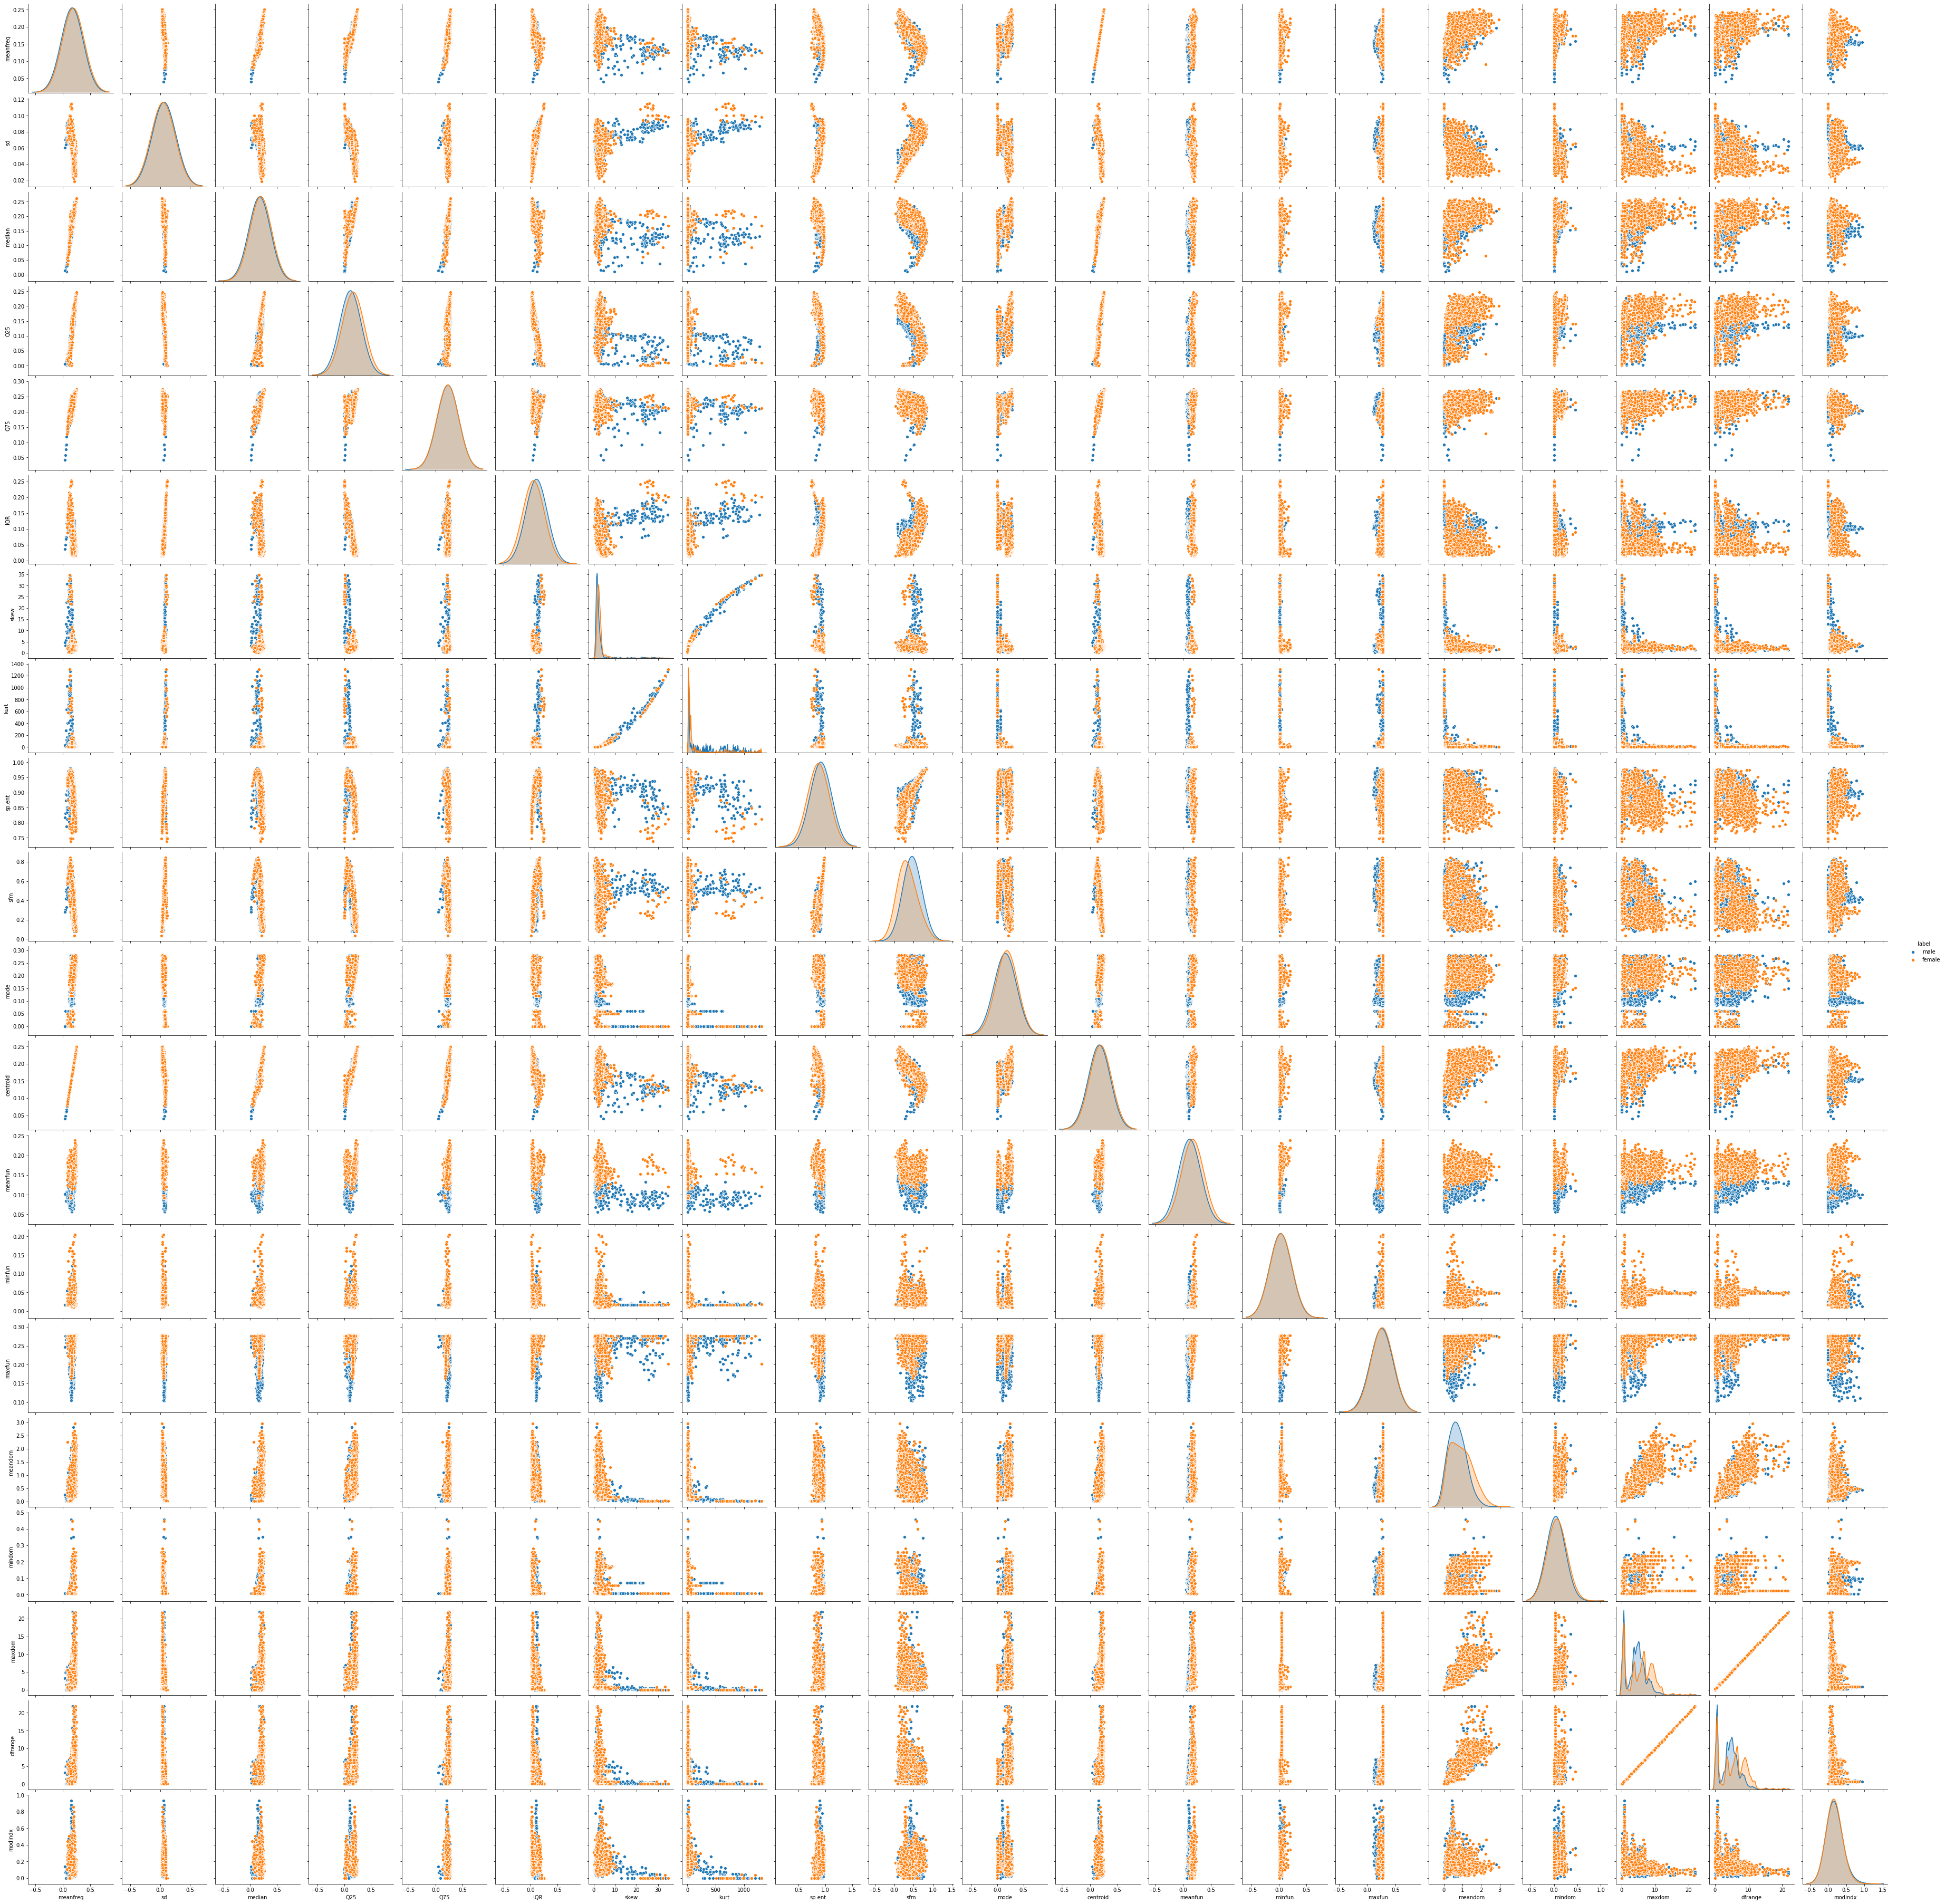

In [ ]:
sb.pairplot(voice, hue='label',diag_kws={'bw': 0.2})

In [ ]:
voice['label'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
voice['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

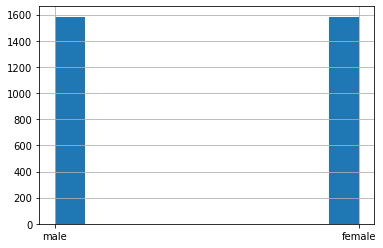

In [ ]:
voice['label'].hist()

histo diagram shows us that the number of female examples equal the number of male examples

In [ ]:
voice.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [ ]:
voice[(voice['meanfreq'] == 0.0000 ) | (voice['sd'] == 0.0000 ) |(voice['median'] == 0.0000)
     |(voice['Q25'] == 0.0000 )|(voice['Q75'] == 0.0000 )|(voice['IQR'] == 0.0000 )
     |(voice['skew'] == 0.0000 )|(voice['kurt'] == 0.0000 )|(voice['sp.ent'] == 0.0000 )
     |(voice['sfm'] == 0.0000)|(voice['mode'] == 0.0000 )|(voice['centroid'] == 0.0000 )
     |(voice['meanfun'] == 0.0000 )|(voice['minfun'] == 0.0000 )|(voice['maxfun'] == 0.0000)
     |(voice['meandom'] == 0.0000 )|(voice['mindom']== 0.0000 )|(voice['maxdom']== 0.0000 )
     |(voice['dfrange']== 0.0000 )|(voice['modindx']== 0.0000 )|(voice['label']== 0.0000 )]

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
73    0.200830  0.053066  0.210059  0.185332  0.236198  0.050866   1.840901   
75    0.190325  0.051696  0.191410  0.156900  0.220584  0.063685   1.461859   
...        ...       ...       ...       ...       ...       ...        ...   
2955  0.134838  0.100239  0.202387  0.009745  0.215438  0.205693  29.969000   
2956  0.132350  0.092796  0.150634  0.036282  0.216193  0.179911  25.115811   
2957  0.121456  0.099999  0.159258  0.005410  0.212921  0.207512  27.297721   
2958  0.134325  0.099657  0.198358  0.010187  0.215821  0.205634  33.167300   
3152  0.149731  0.082852  0.180932  0.060212  0.219788  0.159576   1.240037   

             kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0      274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1      634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2     1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
73       6.006801  0.907683  0.386818  ...  0.200830  0.165155  0.015764   
75       5.360319  0.918001  0.362344  ...  0.190325  0.152013  0.021136   
...           ...       ...       ...  ...       ...       ...       ...   
2955   989.215323  0.785192  0.360357  ...  0.134838  0.162348  0.017957   
2956   693.730091  0.866899  0.591102  ...  0.132350  0.153273  0.016260   
2957   813.070634  0.790010  0.405432  ...  0.121456  0.152380  0.016097   
2958  1202.684552  0.796780  0.384270  ...  0.134325  0.156510  0.016113   
3152     4.019385  0.949787  0.652936  ...  0.149731  0.183974  0.051948   

        maxfun   meandom    mindom    maxdom   dfrange   modindx   label  
0     0.275862  0.007812  0.007812  0.007812  0.000000  0.000000    male  
1     0.250000  0.009014  0.007812  0.054688  0.046875  0.052632    male  
2     0.271186  0.007990  0.007812  0.015625  0.007812  0.046512    male  
73    0.271186  1.067057  0.070312  5.593750  5.523438  0.336376    male  
75    0.246154  0.884549  0.007812  6.718750  6.710938  0.211735    male  
...        ...       ...       ...       ...       ...       ...     ...  
2955  0.271186  0.007812  0.007812  0.007812  0.000000  0.000000  female  
2956  0.266667  0.007812  0.007812  0.007812  0.000000  0.000000  female  
2957  0.262295  0.007812  0.007812  0.007812  0.000000  0.000000  female  
2958  0.275862  0.023290  0.007812  0.828125  0.820312  0.038462  female  
3152  0.253968  1.361213  0.203125  6.031250  5.828125  0.365700  female  

[240 rows x 21 columns]

so as we see the data is perfect ,but there are many zeros data all of them for males and when we drop them male examples will be less than female

In [ ]:
voice.drop(voice[(voice['meanfreq'] == 0.0000 ) | (voice['sd'] == 0.0000 ) |(voice['median'] == 0.0000)
     |(voice['Q25'] == 0.0000 )|(voice['Q75'] == 0.0000 )|(voice['IQR'] == 0.0000 )
     |(voice['skew'] == 0.0000 )|(voice['kurt'] == 0.0000 )|(voice['sp.ent'] == 0.0000 )
     |(voice['sfm'] == 0.0000)|(voice['mode'] == 0.0000 )|(voice['centroid'] == 0.0000 )
     |(voice['meanfun'] == 0.0000 )|(voice['minfun'] == 0.0000 )|(voice['maxfun'] == 0.0000)
     |(voice['meandom'] == 0.0000 )|(voice['mindom']== 0.0000 )|(voice['maxdom']== 0.0000 )
     |(voice['dfrange']== 0.0000 )|(voice['modindx']== 0.0000 )|(voice['label']== 0.0000 )].index , inplace = True)

In [ ]:
voice.to_csv('dataset/voice-clean.csv', index=False)

In [ ]:
voice[(voice['meanfreq'] == 0.0000 ) | (voice['sd'] == 0.0000 ) |(voice['median'] == 0.0000)
     |(voice['Q25'] == 0.0000 )|(voice['Q75'] == 0.0000 )|(voice['IQR'] == 0.0000 )
     |(voice['skew'] == 0.0000 )|(voice['kurt'] == 0.0000 )|(voice['sp.ent'] == 0.0000 )
     |(voice['sfm'] == 0.0000)|(voice['mode'] == 0.0000 )|(voice['centroid'] == 0.0000 )
     |(voice['meanfun'] == 0.0000 )|(voice['minfun'] == 0.0000 )|(voice['maxfun'] == 0.0000)
     |(voice['meandom'] == 0.0000 )|(voice['mindom']== 0.0000 )|(voice['maxdom']== 0.0000 )
     |(voice['dfrange']== 0.0000 )|(voice['modindx']== 0.0000 )|(voice['label']== 0.0000 )]

Empty DataFrame
Columns: [meanfreq, sd, median, Q25, Q75, IQR, skew, kurt, sp.ent, sfm, mode, centroid, meanfun, minfun, maxfun, meandom, mindom, maxdom, dfrange, modindx, label]
Index: []

In [ ]:
voice['label'].value_counts()

female    1508
male      1420
Name: label, dtype: int64

the result of drop is male recordes (1420) less than female records (1508)

In [ ]:
voice['kurtlog']=np.log(voice['kurt'])

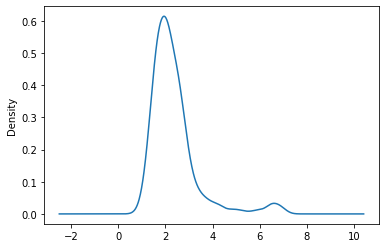

In [ ]:
voice['kurtlog'].plot.kde()

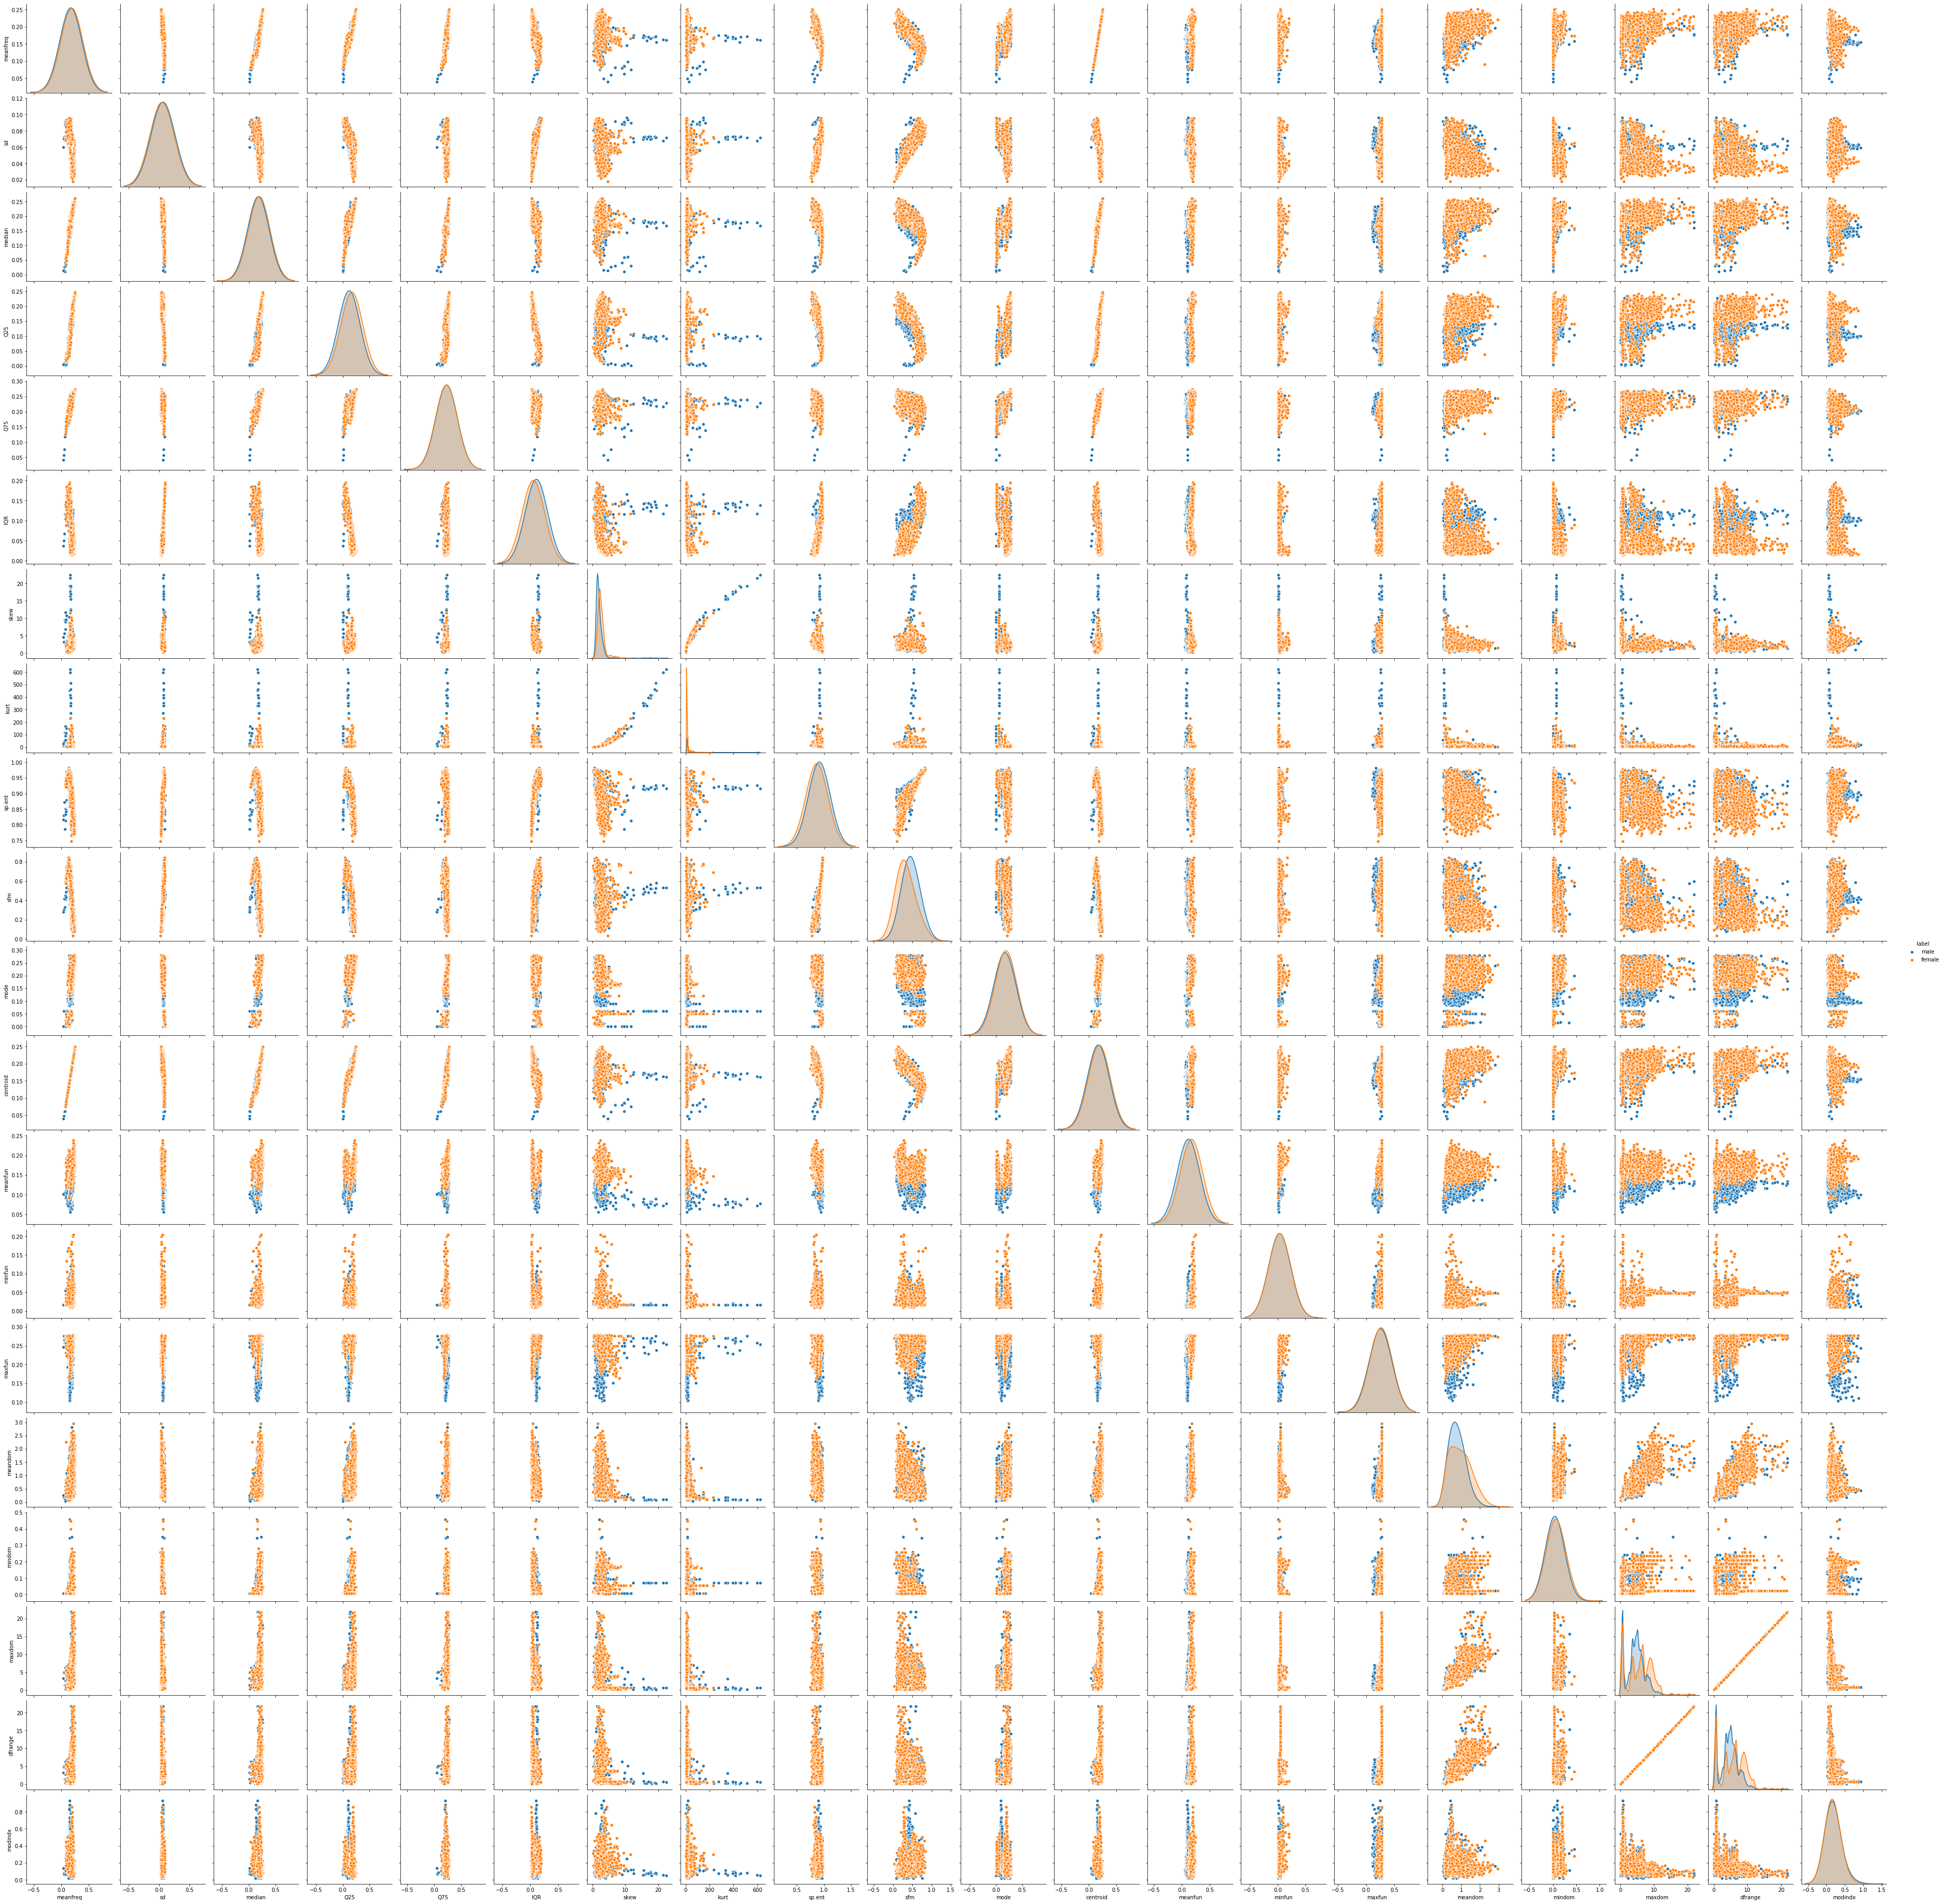

In [ ]:
sb.pairplot(voice, hue='label',diag_kws={'bw': 0.2})

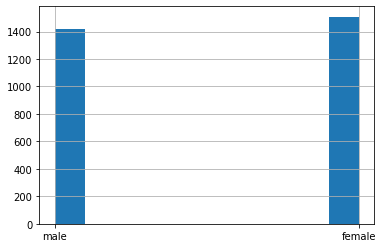

In [ ]:
voice['label'].hist()

I searched about if zero values are null and there is no clear result so I tried to talk with The site from which the data was taken, but no response has been received yet

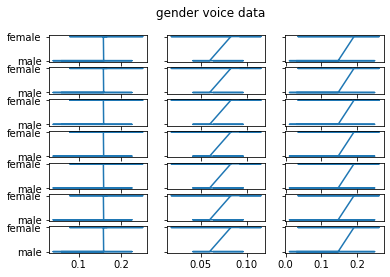

In [ ]:
features=voice.columns
fig, ax = plt.subplots(7,3)
fig.suptitle('gender voice data')
for c in range(7):
    x=0
    for i in features:
        if x==3:
            break
        ax[c,x].plot(voice[i],voice['label'] )
        ax[c,x].subtitle()
        x+=1
        
for ax in fig.get_axes():
    ax.label_outer()

In [ ]:
mapdec={'male':1,'female':0}
voice['labelnew']=voice['label'].map(mapdec)

In [ ]:
assert len(voice['label'].unique()) == 2

# Spliting data

In [ ]:
import numpy as np

In [ ]:
clenvoice= pd.read_csv('dataset/voice-clean.csv')

In [ ]:
all_inputs = clenvoice[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
                    'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
                    'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']].values
all_labels = clenvoice['label'].values
all_inputs

array([[0.15122809, 0.07211059, 0.15801119, ..., 0.5625    , 0.5546875 ,
        0.24711908],
       [0.13512039, 0.0791461 , 0.12465623, ..., 5.484375  , 5.4765625 ,
        0.20827389],
       [0.13278641, 0.07955687, 0.11908985, ..., 2.7265625 , 2.71875   ,
        0.12515964],
       ...,
       [0.14205626, 0.09579843, 0.18373124, ..., 2.9375    , 2.9296875 ,
        0.19475862],
       [0.14365875, 0.09062826, 0.18497617, ..., 3.59375   , 3.5859375 ,
        0.31100218],
       [0.16550895, 0.09288354, 0.18304392, ..., 0.5546875 , 0.546875  ,
        0.35      ]])

In [ ]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.30, random_state=1)

# DecisionTreeClassifier


# Extra Filttering

In [ ]:
voice['kurtlog']=np.log(voice['kurt'])

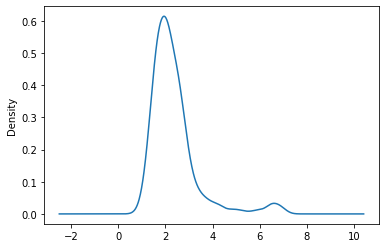

In [ ]:
voice['kurtlog'].plot.kde()

In [ ]:
voice.corr()

meanfreq        sd    median       Q25       Q75       IQR  \
meanfreq  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
sd       -0.739039  1.000000 -0.562603 -0.846931 -0.161076  0.874660   
median    0.925445 -0.562603  1.000000  0.774922  0.731849 -0.477352   
Q25       0.911416 -0.846931  0.774922  1.000000  0.477140 -0.874189   
Q75       0.740997 -0.161076  0.731849  0.477140  1.000000  0.009636   
IQR      -0.627605  0.874660 -0.477352 -0.874189  0.009636  1.000000   
skew     -0.322327  0.314597 -0.257407 -0.319475 -0.206339  0.249497   
kurt     -0.316036  0.346241 -0.243382 -0.350182 -0.148881  0.316185   
sp.ent   -0.601203  0.716620 -0.502005 -0.648126 -0.174905  0.640813   
sfm      -0.784332  0.838086 -0.661690 -0.766875 -0.378198  0.663601   
mode      0.687715 -0.529150  0.677433  0.591277  0.486857 -0.403764   
centroid  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
meanfun   0.460844 -0.466281  0.414909  0.545035  0.155091 -0.534462   
minfun    0.383937 -0.345609  0.337602  0.320994  0.258002 -0.222680   
maxfun    0.274004 -0.129662  0.251328  0.199841  0.285584 -0.069588   
meandom   0.536666 -0.482726  0.455943  0.467403  0.359181 -0.333362   
mindom    0.229261 -0.357667  0.191169  0.302255 -0.023750 -0.357037   
maxdom    0.519528 -0.482278  0.438919  0.459683  0.335114 -0.337877   
dfrange   0.515570 -0.475999  0.435621  0.454394  0.335648 -0.331563   
modindx  -0.216979  0.122660 -0.213298 -0.141377 -0.216475  0.041252   
kurtlog  -0.338361  0.264349 -0.294325 -0.252365 -0.305187  0.118521   

              skew      kurt    sp.ent       sfm  ...  centroid   meanfun  \
meanfreq -0.322327 -0.316036 -0.601203 -0.784332  ...  1.000000  0.460844   
sd        0.314597  0.346241  0.716620  0.838086  ... -0.739039 -0.466281   
median   -0.257407 -0.243382 -0.502005 -0.661690  ...  0.925445  0.414909   
Q25      -0.319475 -0.350182 -0.648126 -0.766875  ...  0.911416  0.545035   
Q75      -0.206339 -0.148881 -0.174905 -0.378198  ...  0.740997  0.155091   
IQR       0.249497  0.316185  0.640813  0.663601  ... -0.627605 -0.534462   
skew      1.000000  0.977020 -0.195459  0.079694  ... -0.322327 -0.167668   
kurt      0.977020  1.000000 -0.127644  0.109884  ... -0.316036 -0.194560   
sp.ent   -0.195459 -0.127644  1.000000  0.866411  ... -0.601203 -0.513194   
sfm       0.079694  0.109884  0.866411  1.000000  ... -0.784332 -0.421066   
mode     -0.434859 -0.406722 -0.325298 -0.485913  ...  0.687715  0.324771   
centroid -0.322327 -0.316036 -0.601203 -0.784332  ...  1.000000  0.460844   
meanfun  -0.167668 -0.194560 -0.513194 -0.421066  ...  0.460844  1.000000   
minfun   -0.216954 -0.203201 -0.305826 -0.362100  ...  0.383937  0.339387   
maxfun   -0.080861 -0.045667 -0.120738 -0.192369  ...  0.274004  0.311950   
meandom  -0.336848 -0.303234 -0.293562 -0.428442  ...  0.536666  0.270840   
mindom   -0.061608 -0.103313 -0.294869 -0.289593  ...  0.229261  0.162163   
maxdom   -0.305651 -0.274500 -0.324253 -0.436649  ...  0.519528  0.277982   
dfrange  -0.304640 -0.272729 -0.319054 -0.431580  ...  0.515570  0.275154   
modindx  -0.169325 -0.205539  0.198074  0.211477  ... -0.216979 -0.054858   
kurtlog   0.888562  0.790563 -0.203526  0.092236  ... -0.338361 -0.125285   

            minfun    maxfun   meandom    mindom    maxdom   dfrange  \
meanfreq  0.383937  0.274004  0.536666  0.229261  0.519528  0.515570   
sd       -0.345609 -0.129662 -0.482726 -0.357667 -0.482278 -0.475999   
median    0.337602  0.251328  0.455943  0.191169  0.438919  0.435621   
Q25       0.320994  0.199841  0.467403  0.302255  0.459683  0.454394   
Q75       0.258002  0.285584  0.359181 -0.023750  0.335114  0.335648   
IQR      -0.222680 -0.069588 -0.333362 -0.357037 -0.337877 -0.331563   
skew     -0.216954 -0.080861 -0.336848 -0.061608 -0.305651 -0.304640   
kurt     -0.203201 -0.045667 -0.303234 -0.103313 -0.274500 -0.272729   
sp.ent   -0.305826 -0.120738 -0.293562 -0.294869 -0.324253 -0.319054   
sfm      -

In [ ]:
mapdec={'male':1,'female':0}
voice['labelnew']=voice['label'].map(mapdec)

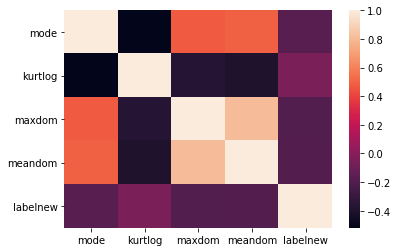

In [ ]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = voice[['mode','kurtlog','maxdom','meandom','labelnew']].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

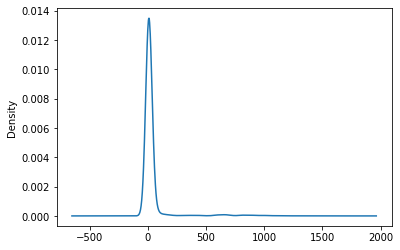

In [ ]:
voice['kurt'].plot.kde()

 we'll try to balanced data

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier(class_weight='balanced')
# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
print('decision_tree_classifier.score =',decision_tree_classifier.score(testing_inputs, testing_classes))

decision_tree_classifier.score = 0.9692832764505119


In [ ]:
import numpy as np 
decision_tree_classifier.predict(np.array([[0.201228,0.1121106,0.158011,0.0965817,
                                            0.207955,0.111374,1.23283,4.1773,0.963322,
                                            0.727232,0.2038782,0.151228,0.0889648,0.0177976,
                                            0.25,0.201497,0.0078125,0.5625,0.554688,0.247119]]))

array(['male'], dtype=object)

(array([  2.,   5.,  29.,  65., 200., 282., 188., 179.,  43.,   7.]),
 array([0.94084187, 0.94505119, 0.94926052, 0.95346985, 0.95767918,
        0.96188851, 0.96609784, 0.97030717, 0.9745165 , 0.97872582,
        0.98293515]),
 <a list of 10 Patch objects>)

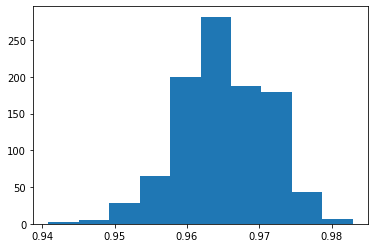

In [ ]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.30)
    
    decision_tree_classifier = DecisionTreeClassifier(max_depth=25,criterion='gini')
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)


In [ ]:
max(model_accuracies)*100

98.29351535836177

(array([  3.,  13.,  53.,  97., 160., 245., 206., 156.,  56.,  11.]),
 array([0.94653015, 0.95005688, 0.95358362, 0.95711035, 0.96063709,
        0.96416382, 0.96769056, 0.97121729, 0.97474403, 0.97827076,
        0.9817975 ]),
 <a list of 10 Patch objects>)

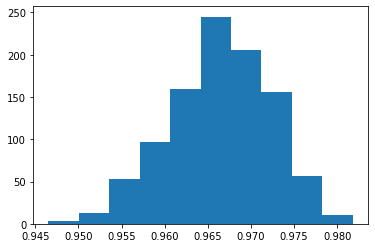

In [ ]:
model2_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.30)
    
    decision_tree_classifier = DecisionTreeClassifier(max_depth=25,criterion='entropy')
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model2_accuracies.append(classifier_accuracy)
    
plt.hist(model2_accuracies)

In [ ]:
max(model2_accuracies)*100

98.1797497155859

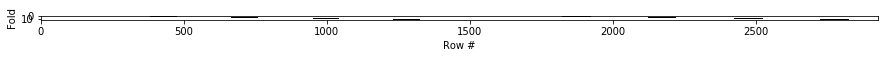

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=15), all_inputs, all_labels)

''

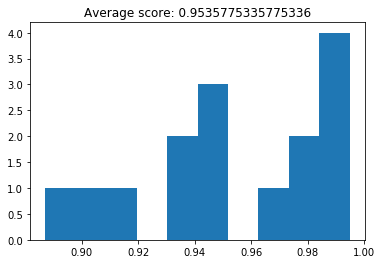

In [ ]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=15)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.average(cv_scores)))
;

''

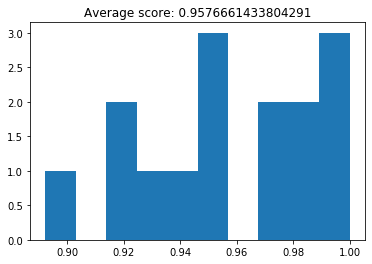

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=10)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=15)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.average(cv_scores)))
;

In [ ]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9655009584365797
Best parameters: {'max_depth': 4, 'max_features': 19}


''

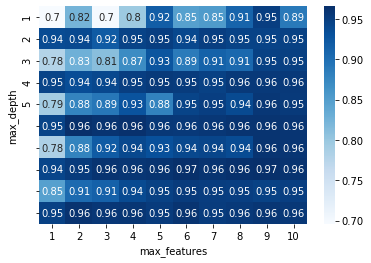

In [ ]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (10,10)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(10) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(10) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
;

The previous figure shows that the best accuracy is 0.97 and that the best max_depth is 8, where max_features is 6 or 9 feature

''

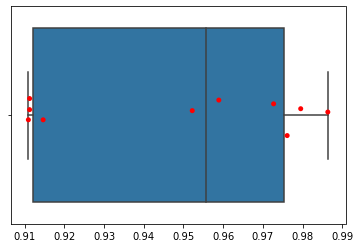

In [ ]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)

sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='r')
;

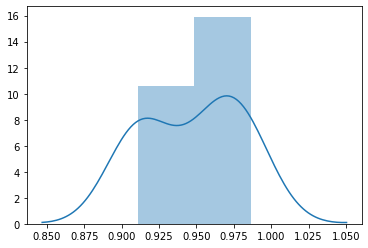

In [ ]:
sb.distplot(dt_scores)

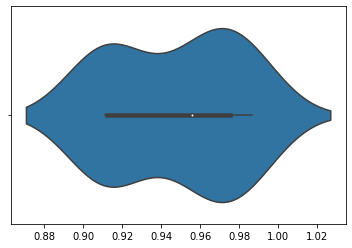

In [ ]:
sb.violinplot(dt_scores)

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5,6],
                  'max_features': [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

cross_validation = StratifiedKFold(n_splits=15)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9685801500087214
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 17, 'splitter': 'best'}


In [ ]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=17, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50,100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.9695976904016084
Best parameters: {'criterion': 'entropy', 'max_features': 16, 'n_estimators': 25}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=16,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

''

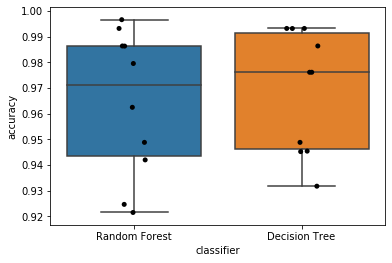

In [ ]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')
;

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
from sklearn.model_selection import train_test_split
(training_inputs,
 testing_inputs,
 training_labels,
 testing_labels) = train_test_split(all_inputs, all_labels, test_size=0.30, random_state=7)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
training_inputs = sc.fit_transform(training_inputs)
testing_inputs = sc.transform(testing_inputs)

In [ ]:
results = []
names = []
seed=42
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, training_inputs, training_labels, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}, {cv_results.mean()}, {cv_results.std()}))")

LR, 0.9760856049736967, 0.007382704456226085))
LDA, 0.9721855571496892, 0.005778723483776519))
KNN, 0.9707173601147776, 0.006170447992458339))
CART, 0.9716977522716403, 0.01128609698754603))
NB, 0.9160569105691057, 0.018991398326364508))
SVM, 0.9824318507890961, 0.0049704774050784595))


so the best accuracy is 0.982 we got it is from the support vector machine algorithm

In [ ]:
cls = SVC()
cls.fit(training_inputs,training_labels)
label_pred = cls.predict(testing_inputs)
print('--------------------------------------------------------')

print("------- Accuracy --------\n")
print(accuracy_score(testing_labels,label_pred))
print('--------------------------------------------------------')

print("------- Confusion Matrix --------\n")

print(confusion_matrix(testing_labels,label_pred))

print('--------------------------------------------------------')


print("------- Classifcation Report-------- \n")


print(classification_report(testing_labels,label_pred))

print('--------------------------------------------------------')

--------------------------------------------------------
------- Accuracy --------

0.9783845278725825
--------------------------------------------------------
------- Confusion Matrix --------

[[454   8]
 [ 11 406]]
--------------------------------------------------------
------- Classifcation Report-------- 

              precision    recall  f1-score   support

      female       0.98      0.98      0.98       462
        male       0.98      0.97      0.98       417

    accuracy                           0.98       879
   macro avg       0.98      0.98      0.98       879
weighted avg       0.98      0.98      0.98       879

--------------------------------------------------------


**Neural Network Algorithem **

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adagrad

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(20,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(training_inputs, training_classes, epochs=100, verbose=1)

Epoch 1/100


UnimplementedError: ignored

**Data Filtering**

In [ ]:
voice.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [ ]:
voice[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']].corr()

meanfreq        sd    median  ...    maxdom   dfrange   modindx
meanfreq  1.000000 -0.718722  0.925238  ...  0.470748  0.466875 -0.316035
sd       -0.718722  1.000000 -0.545884  ... -0.419458 -0.413022  0.209956
median    0.925238 -0.545884  1.000000  ...  0.397816  0.394603 -0.294485
Q25       0.909021 -0.834287  0.777460  ...  0.405929  0.400463 -0.243165
Q75       0.744426 -0.135479  0.732740  ...  0.318814  0.319579 -0.274353
IQR      -0.598445  0.865562 -0.456363  ... -0.275101 -0.268477  0.116648
skew     -0.092964 -0.030437 -0.098549  ... -0.207746 -0.210520  0.084841
kurt     -0.106621  0.092906 -0.088286  ... -0.183086 -0.184018 -0.001466
sp.ent   -0.685783  0.855292 -0.545418  ... -0.361596 -0.355504  0.173014
sfm      -0.798067  0.878768 -0.658403  ... -0.418002 -0.412610  0.242507
mode      0.674492 -0.424299  0.705631  ...  0.384419  0.382093 -0.307295
centroid  1.000000 -0.718722  0.925238  ...  0.470748  0.466875 -0.316035
meanfun   0.437805 -0.479404  0.372671  ...  0.249434  0.246516 -0.102939
minfun    0.333400 -0.286031  0.295274  ...  0.261137  0.260247 -0.031479
maxfun    0.301681 -0.141655  0.276053  ...  0.382616  0.387095 -0.395532
meandom   0.478416 -0.406516  0.405947  ...  0.789082  0.787798 -0.257276
mindom    0.184016 -0.323377  0.152301  ... -0.039003 -0.057694  0.194329
maxdom    0.470748 -0.419458  0.397816  ...  1.000000  0.999825 -0.512589
dfrange   0.466875 -0.413022  0.394603  ...  0.999825  1.000000 -0.515764
modindx  -0.316035  0.209956 -0.294485  ... -0.512589 -0.515764  1.000000

[20 rows x 20 columns]

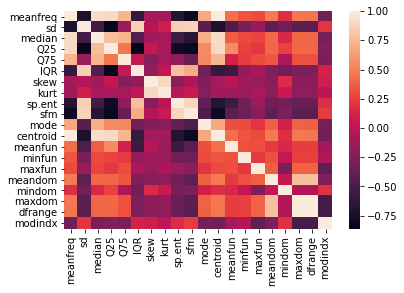

In [ ]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = voice[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
v=voice['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']

SyntaxError: ignored

In [ ]:
pca = PCA().fit(voice.values)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

ValueError: ignored

Reproducibility

In [ ]:
!pip install watermark

In [ ]:
%load_ext watermark

In [ ]:
%watermark -a 'Anwar_Abbass' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

Author: Anwar_Abbass

Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.12.0

numpy     : 1.18.1
pandas    : 1.0.1
sklearn   : 0.22.1
matplotlib: 3.1.3
seaborn   : 0.10.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 69 Stepping 1, GenuineIntel
CPU cores   : 4
Architecture: 64bit

